In [1]:
# normalized SIS model , beta = 3 gamma = 2, s0 = .99 i0 = .01
# 3 plots, t0 to t25, step sizes 2, 1 , .5
# y range from 0 to .5
# plot only I(T) in red forward euler, analytical solution black dashed line


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def SIS(s0,i0, beta, gamma, t_max, stepsize):
    T = np.arange(0, t_max+stepsize, stepsize)
    s = np.zeros(len(T))
    i = np.zeros(len(T))
    a = np.zeros(len(T))
    
    for idx, t in enumerate(T):
        if (idx == 0):
            s[idx] = s0
            i[idx] = i0
            a[idx] = (1 - (gamma / beta)) / (1 + (((1 - (gamma / beta) -i0) / i0) * np.exp(-(beta / gamma) * t))) # ugly formula
        else:
            ds_dt = (-beta * s[idx - 1] * i[idx-1]) + (gamma * i[idx-1])
            di_dt = (beta * s[idx-1] * i[idx-1]) - (gamma * i[idx-1])

            s[idx] = s[idx-1] + ds_dt * stepsize
            i[idx] = i[idx-1] + di_dt * stepsize
            a[idx] = (1 - (gamma / beta)) / (1 + (((1 - (gamma / beta) -i0) / i0) * np.exp(-(beta / gamma) * t))) # ugly formula

    return i, T, a

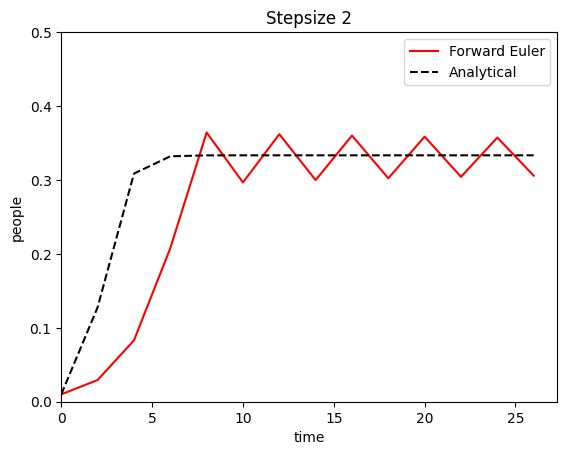

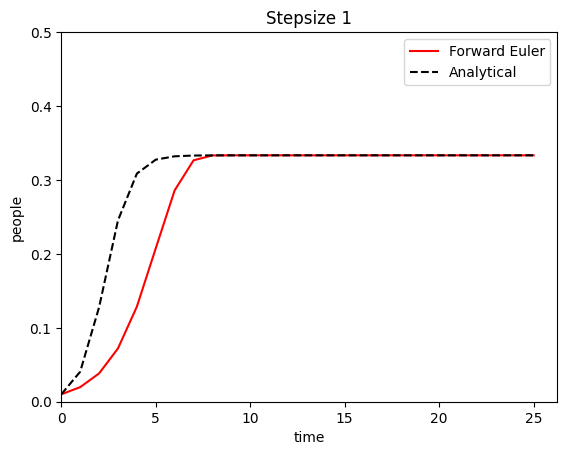

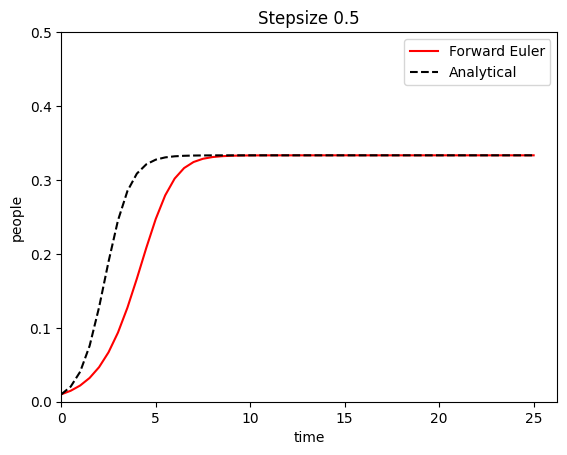

In [23]:
stepsizes = [2,1,0.5]

analytical = 0.4

for idx,stepsize in enumerate(stepsizes):
    i,t,a = SIS(s0 = .99, i0 = .01, beta = 3, gamma = 2, t_max = 25, stepsize = stepsize)

    plt.plot(t, i, color='r', label='Forward Euler')
    plt.plot(t, a, color='k', label='Analytical', linestyle = 'dashed')

    plt.xlabel('time')
    plt.ylabel('people')
    plt.legend()
    plt.ylim(bottom=0,top=0.5)
    plt.xlim(left=0)
    plt.title("Stepsize " + str(stepsize))
    plt.show()

In [27]:
def get_max_error(stepsize):
    euler, _, analytical = SIS(s0 = .99, i0 = .01, beta = 3, gamma = 2, t_max = 25, stepsize = stepsize)
    return np.max(np.abs(euler - analytical))

/var/folders/_w/gp8nnlr91_z593hlmspjf9g80000gn/T/ipykernel_42759/3244832061.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


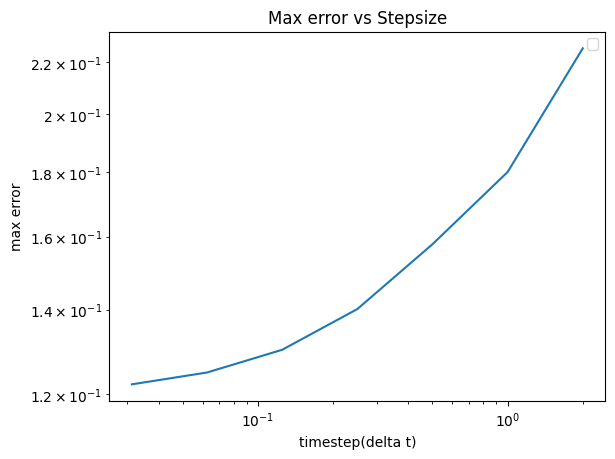

In [42]:
stepsizes = [2,1,0.5, .25, .125, .0625, .03125]

errors = []

for stepsize in stepsizes:
    errors.append(get_max_error(stepsize))

plt.loglog(stepsizes, errors)
plt.xlabel('timestep(delta t)')
plt.ylabel('max error')
plt.legend()
plt.title("Max error vs Stepsize")
plt.show()
